In [4]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [15]:
class multiclass(object): 
    def __init__(self):
        self.W1 = None
        self.b1 = 0
        self.W2 = None
        self.b2 = 0
        
    def load_data(self):
        with open('spiral_train.dat','r') as f:
            return np.array([i.strip().split(',') for i in f.readlines()], dtype=float)      
        
    def hypothesis(self, X, w=None, b=None):
        f = np.dot(X,w) + b
        f = np.exp(f)
        denom = f.sum(axis=1)
        for i in range(len(denom)):
            f[i,:] /= denom[i]
        return f
    
    def forward(self, X):
        hidden = self.hypothesis(X, self.W1, self.b1)
        output = self.hypothesis(hidden, self.W2, self.b2)
        return hidden, output
    
    def loss(self, p, y, w=None, lamb=0.9):        
        return -1 * (np.sum(y*np.log(p))/len(y) + (lamb/2) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2))))

    def gradients(self, X, hidden, Y, step_size=0.8):
        z, p = self.forward(X)
        
        dj_dw2 = np.dot(hidden.T, (p - Y))
        dj_db2 = sum(p - Y)
        
        dj_db1 = np.multiply(np.dot(self.W2, sum(p-Y)), 1-hidden*hidden)
        dj_dw1 = np.dot(X.T, dj_db1)
        
        result = np.array([[dj_dw2, dj_db2],
                           [dj_dw1, dj_db1]])
        return result
    
    def train(self, X, Y):
        epochs = 100
        losses_per_epoch = []

        Z, p = self.forward(X)
        
        J = self.loss(p, Y)
        for i in range(epochs):           
            if J < 0.1:
                print('loss is minimum i.e.', J)
                break
            z_train, py_train = self.forward(X)
#             z_valid, py_valid = self.forward(Xvalid)

            self.w2 -= step_size * np.dot(z_train.T, (py_train - Y))
            self.b2 -= step_size * sum(py_train - Y)
            
            dj_by_dz = np.multiply(np.dot((py_train - Y), self.w2.T), (1-z_train*z_train))
            self.w1 -= step_size * np.dot(X.T, dj_by_dz)
            self.b1 -= step_size * sum(dj_by_dz)
            Z, p = self.forward(X)
            J = self.loss(p, Y)
            losses_per_epoch.append(J)
        
        correct = 0
        total = 0
        for i in range(len(p)):
            if np.argmax(Y[i]) == np.argmax(p[i]):
                correct += 1
            total += 1
        print('accuracy = ', (correct/total)*100)
        %matplotlib notebook
        plt.plot(losses_per_epoch)
        plt.title('Losses per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.plot()
        plt.show()
    
    def main(self):
        data = self.load_data()
        np.random.shuffle(data)
        X, Y = data[:,:-1], data[:,-1]
        N, D = X.shape
        k = len(np.unique(Y))
        
        self.W1 = np.random.normal(scale=1/D**0.5, size=(D,3))
        self.b1 = np.random.normal(scale=1/k**0.5, size=3)
        
        self.W2 = np.random.normal(scale=1/D**0.5, size=(3, k))
        self.b2 = np.random.normal(scale=1/k**0.5, size=k)
        print('W2:', self.W2)
        print('b2:', self.b2)
        print('W1:', self.W1)
        print('b1:', self.b1)
        ind = np.zeros((N, k))
        for i in range(N):
            ind[i, int(Y[i])] = 1
        Y = ind
        self.train(X, Y)
#         data = data[data[:,-1].argsort()]
#         return data
        self.plot_data(X, Y)
    
    def plot_data(self, X, Y):
        z, p = self.forward(X)
#         color = ['r','g','b']
#         regions = [[],[],[]]
#         %matplotlib inline
#         for pt in range(len(p)):
#             plt.scatter(data[pt, 0], data[pt,1], c=color[np.argmax(p[pt])])
#             regions[np.argmax(p[pt])].append(data[pt,:-1])
#         for index,r in enumerate(regions):
#             if len(r) == 0:
#                 continue
#             temp = np.asarray(r)
#             plt.fill_between(temp[:,0], temp[:,1], 0,
#                             facecolor=color[index],
#                             interpolate=True,
#                             alpha=0.5)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02  # step size in the mesh
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        com = np.c_[xx.ravel(), yy.ravel()]
        hidden, Z = self.forward(com)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        
        plt.show()

W2: [[-0.67754037  0.73633949 -0.12671466]
 [ 0.79252422  0.64273106  2.1233761 ]
 [-0.7147253   0.54058441  0.87612532]]
b2: [ 1.43043667 -0.01918781 -0.54453431]
W1: [[ 1.28767409 -0.44699081  0.657133  ]
 [ 0.23578179  0.93528684 -1.24583056]]
b1: [ 0.40545854 -0.10782664  0.28111419]
loss is minimum i.e. -4.655589823000281
accuracy =  33.33333333333333


<IPython.core.display.Javascript object>


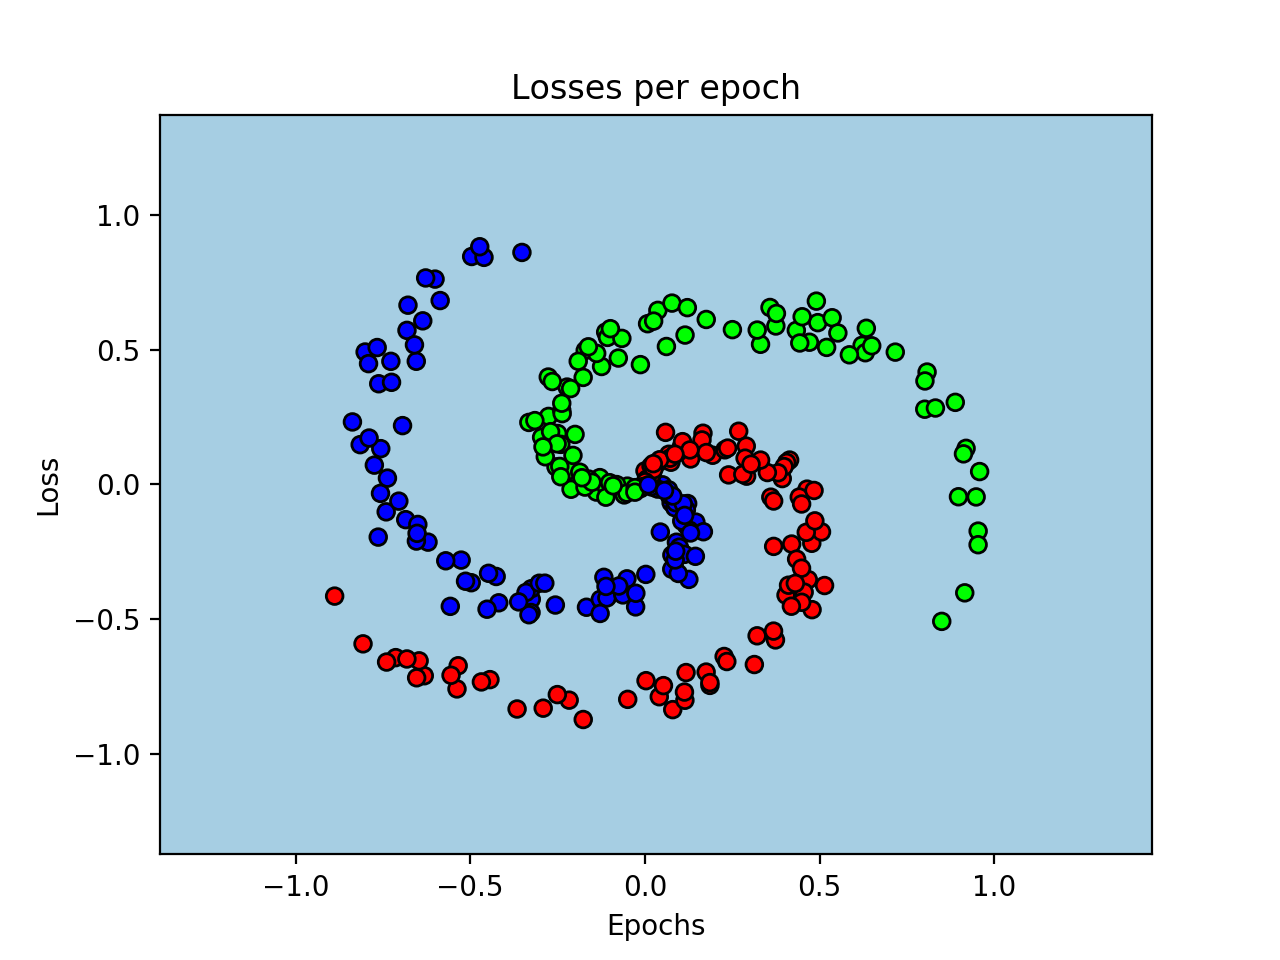

In [16]:
net = multiclass()
net.main()